# COMP529 Assignment 1 - Part 1

Lizhenghe.Chen 

In this assignment I will try to use Facebook instance from [Stanford SANP database ](https://snap.stanford.edu/data/ego-Facebook.html)

# 1. I uploaded the data files to the Google drive, then read and use it though Google Colaboratory

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
filepath='/content/drive/MyDrive/Colab Notebooks/COMP529 Assignment 1 Part1/facebook_combined.txt'

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 2. I use NetworkX to read generate the graph

In [3]:
graph =nx.read_edgelist(filepath, create_using = nx.Graph(), nodetype=int)
nx.info(graph)

'Graph with 4039 nodes and 88234 edges'

In [4]:
pos = nx.spring_layout(graph)# locate the position of nodes to make network graph More dispersed

In [5]:
neigh = range(0,4039)
total=0
value=[]
#Below step will take around 5 mins, since the betweenness_centrality is slow
#betCent = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
# for i in range(len(neigh)):# more connection leads to bigger node size, faster and simple than betCent
#     all_neighbors = list(nx.classes.function.all_neighbors(graph, neigh[i]))#Returns all of the neighbors of a node in the graph.
#     value.append(len(all_neighbors)**2)

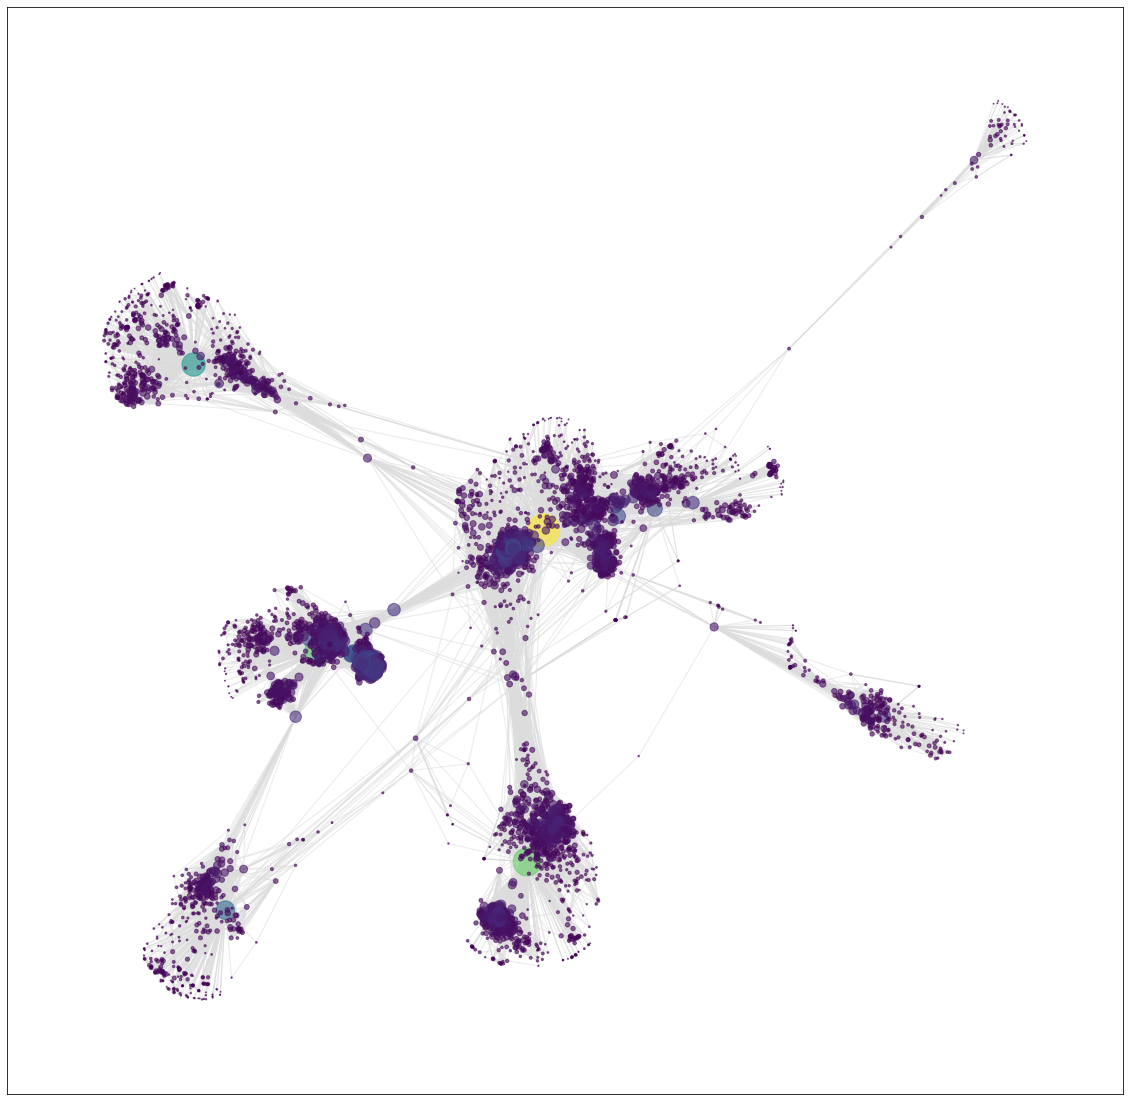

In [6]:
node_color_size = [graph.degree(n) for n in graph] #more connection leads to bigger node size and color index
plt.figure(figsize=(20, 20))
nx.draw_networkx(graph, pos=pos, with_labels=False, edge_color='gainsboro',
                 node_color=node_color_size,
                 node_size=node_color_size,alpha=0.6)

# 3.	Plot the chart showing the in-degree_frequency_frequency_frequency of each user in this network

In [7]:
# neigh = range(0,4039)
# total=0
# for i in range(len(neigh)):
#     all_neighbors = list(nx.classes.function.all_neighbors(graph, neigh[i]))#Returns all of the neighbors of a node in the graph.
#     #print('All neighbors for Node', str(neigh[i]), 'with linked node number:', str(len(all_neighbors)), ' -> ', str(all_neighbors))
#     if(len(all_neighbors)==1):# 1 should appeared 75 times
#       total+=1
# #     total+=len(all_neighbors)
# print('1 should appeare: ',total,' times')

totalDgree:  4039 



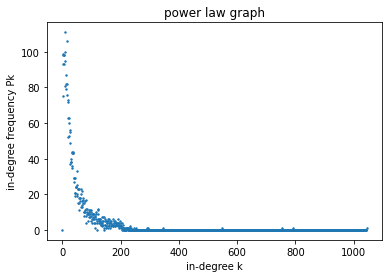

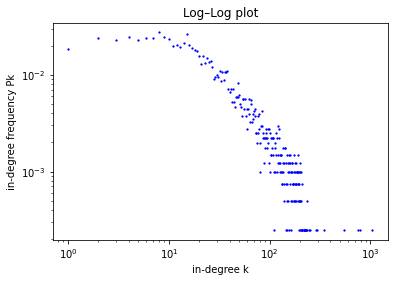

In [8]:
from numpy import polyfit, poly1d
degree_frequency= nx.degree_histogram(graph)#Returns a list of the frequency of each degree_frequency value.like 1 appeared 75 times
#print(degree_frequency)
x = range(len(degree_frequency))  # 0,1,2,3,4...
totalDgree = sum(degree_frequency)
print("totalDgree: ",totalDgree,"\n")
y = [z for z in degree_frequency]
plt.scatter(x, y, s=2)
plt.title('power law graph')
plt.xlabel('in-degree k')
plt.ylabel('in-degree frequency Pk')
plt.show()
plt.close()

print("\n\n")

loglogx = range(len(degree_frequency))  # 生成x轴序列，从1到最大度
loglogy = [z / totalDgree for z in degree_frequency]

k=plt.loglog(loglogx, loglogy, '.', c='blue', markersize=2.5)  # 在双对数坐标轴上绘制度分布曲线
plt.title('Log–Log plot')
plt.xlabel('in-degree k')
plt.ylabel('in-degree frequency Pk')

plt.show()


# 4. identify what kind of network it is:

As we can see from plots in part 3, for this SANP FaceBook data, the power-law graph shows few points have majority hubs in the whole net, while fewer hubs for the rest points.

In other words, in the Hubs, as per power-law distribution, the larger is k, the higher is the probability of observing a hub. For small k, the scale-free network has a large number of small degree nodes.
So it should be a weak **Scale-Free Networks**.


---


Nevertheless, compared with *P54 of the Network Science lecture slides*, we can see the Log-Log figure is a **Sublinear graph** rather than a linear graph because it shows an apparent curve that 0 < α < 1. This means this Facebook network is similar to Science Collaboration networks or Actor networks: Few people have more connections than most other people, **but others with very few hubs**.

On Facebook, these popular people might be famous people or stars, but fans also have their friends and family networks. That is why the graph above doesn't have a linear relation like the WWW, which has much more resources linked to some critical websites, and fewer resources are independent or fewer connections.

The Network graph in Part 2 confirms the above views as few nodes have many hubs, while more nodes have few hubs but still have quite a few nodes with their small hubs.
